In [158]:
#
# create training data from 
#
df = pd.read_csv('TD01.csv')

col = ['Category', 'Value']
df = df[col]
df.columns = ['Category', 'Value']
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df

,Category,Value,category_id
0,Capacitance,f,0
1,Capacitance,F,0
2,Capacitance,farad,0
3,Capacitance,Farad,0
4,Capacitance,farads,0
5,Capacitance,Farads,0
6,Current,a,1
7,Current,A,1
8,Current,amp,1
9,Current,Amp,1


In [197]:
#
# not needed since training data only using single words
#

if True:
    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf = TfidfVectorizer(analyzer='char', sublinear_tf=True, min_df=1, norm=None, encoding='latin-1', ngram_range=(1, 1), stop_words=None)

    features = tfidf.fit_transform(df.Value).toarray()
    labels = df.category_id
    features.shape
    print(labels)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
Name: category_id, dtype: int32


In [190]:
#
# Naive Bayes Classifier
#

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Value'], df['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

#
# This does not fit since my training data consists of single words
#

In [191]:
#
# try making some predictions
#
print(clf.predict(count_vect.transform(["amp"])))
print(clf.predict(count_vect.transform(["volts"])))
print(clf.predict(count_vect.transform(["farads"])))
print(clf.predict(count_vect.transform(["ohm"])))
print(clf.predict(count_vect.transform(["v"])))

['Current']
['Voltage']
['Capacitance']
['Resistance']
['Current']


c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

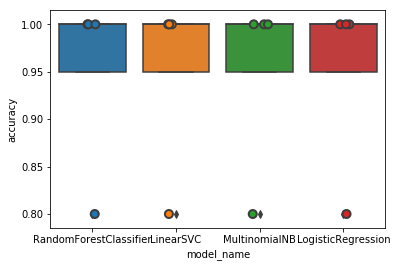

In [111]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 4
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()